# Multiple Linear Regression – Advanced Visual & Statistical Analysis

## Professional Objective
This notebook demonstrates a **Multiple Linear Regression** model with strong emphasis on:
- Statistical understanding
- Interpretability
- Visual diagnostics
- Business insight

Designed similar to TransparentML learning standards.

## 1️⃣ Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.style.use('seaborn-v0_8')

## 2️⃣ Load Dataset
Ensure dataset contains: TV, Radio, Newspaper, Sales

In [2]:
os.getcwd()
df = pd.read_csv("../../../Datasets/advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## 3️⃣ Exploratory Data Analysis

In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


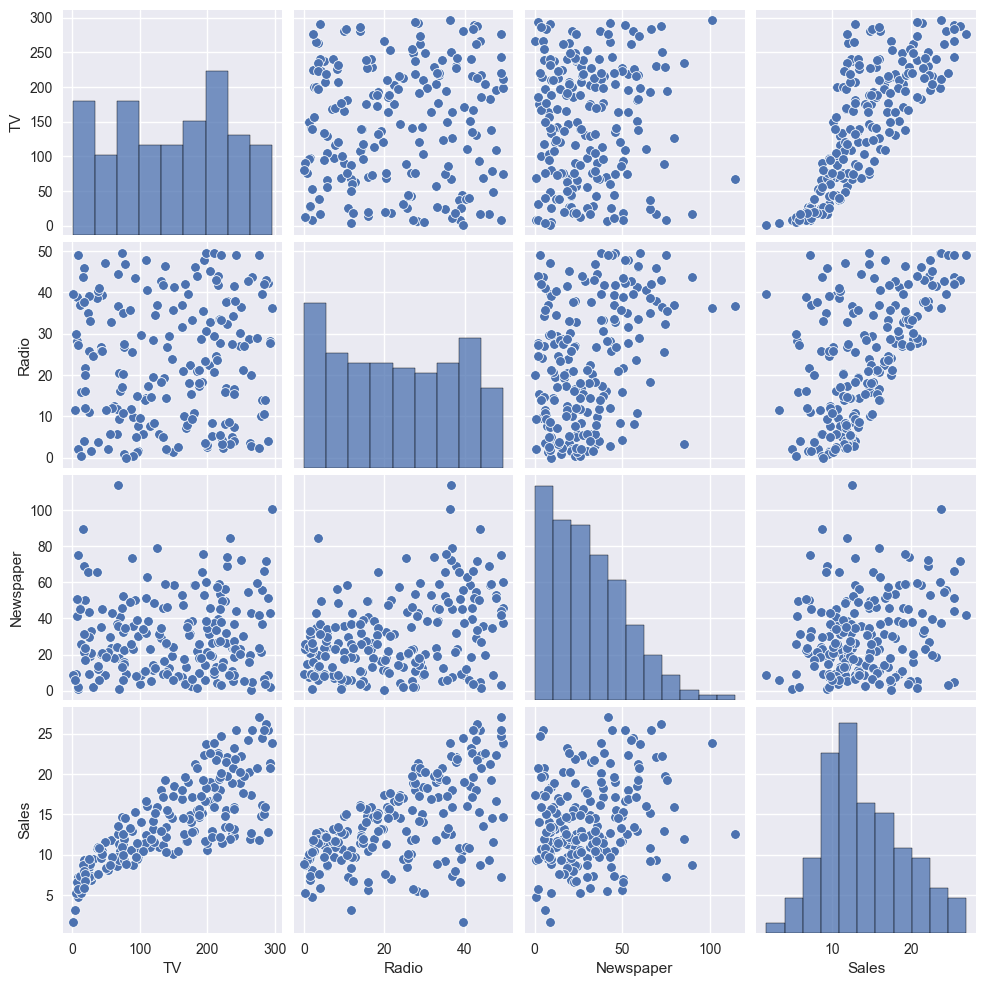

In [4]:
sns.pairplot(df[['TV','Radio','Newspaper','Sales']]);

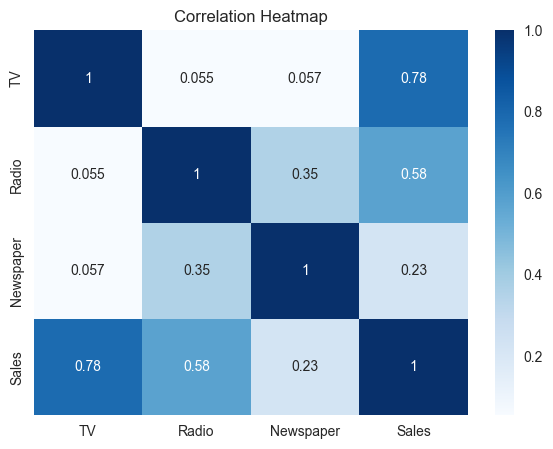

In [5]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

## 4️⃣ Feature Engineering

In [6]:
X = df[['TV','Radio','Newspaper']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## 5️⃣ Train Model (Sklearn)

In [7]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
pd.DataFrame({'Feature':X.columns, 'Coefficient':model.coef_})

,Feature,Coefficient
0,TV,0.044730
1,Radio,0.189195
2,Newspaper,0.002761


### Coefficient Impact Visualization

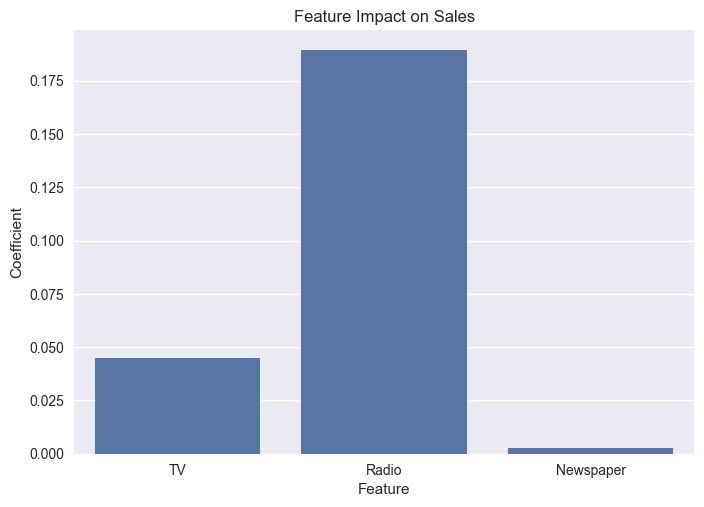

In [8]:
coef_df = pd.DataFrame({'Feature':X.columns,'Coefficient':model.coef_})
sns.barplot(data=coef_df, x='Feature', y='Coefficient')
plt.title('Feature Impact on Sales')
plt.show()

## 6️⃣ Model Performance

In [9]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)
print('R2:',r2)

MAE: 1.4607567168117606
MSE: 3.174097353976104
RMSE: 1.7815996615334502
R2: 0.899438024100912


## 7️⃣ Advanced Statistical Diagnostics (Statsmodels)

In [10]:
X_sm = sm.add_constant(X)
model_sm = sm.OLS(y, X_sm).fit()
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 26 Dec 2025   Prob (F-statistic):           1.58e-96
Time:                        01:48:38   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 8️⃣ Residual Diagnostics

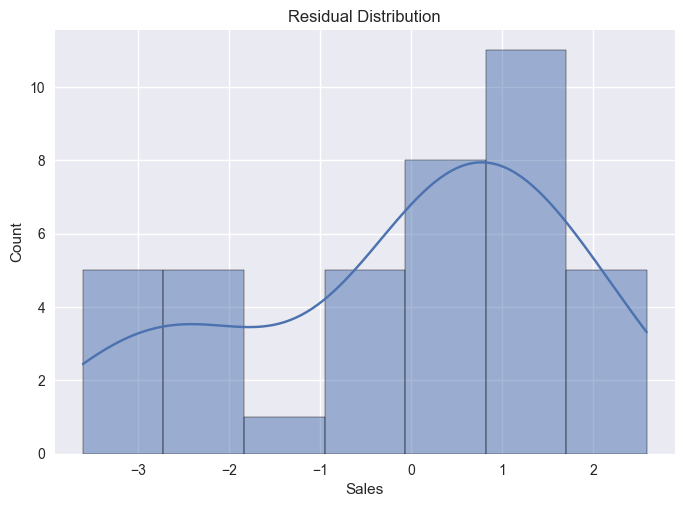

In [11]:
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.show()

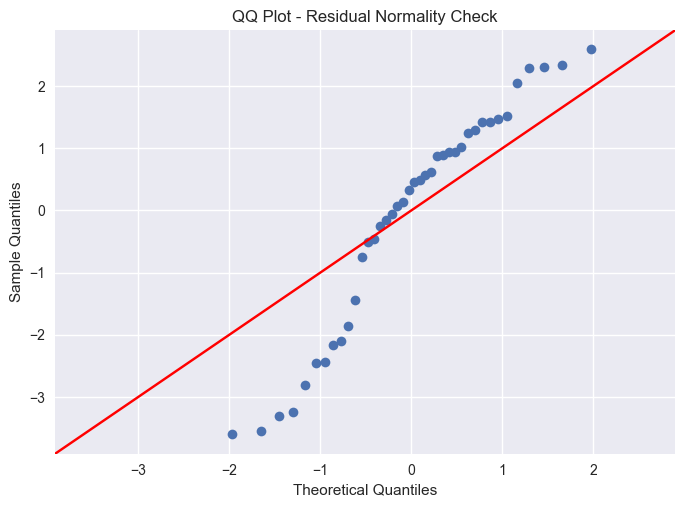

In [12]:
sm.qqplot(residuals, line='45')
plt.title('QQ Plot - Residual Normality Check')
plt.show()

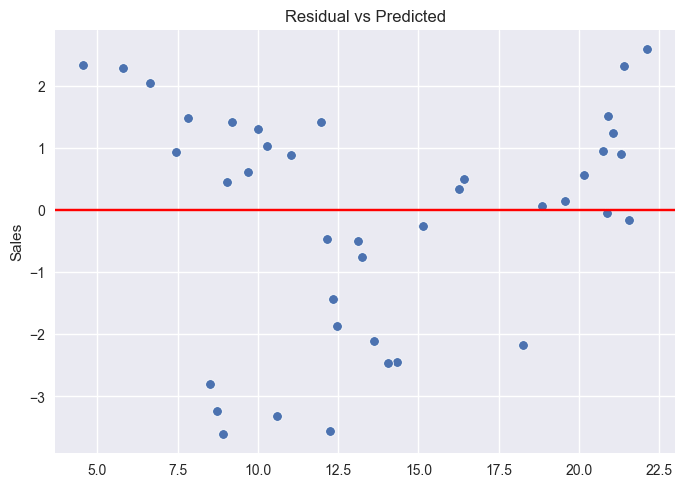

In [13]:
sns.scatterplot(x=y_pred,y=residuals)
plt.axhline(0,color='red')
plt.title('Residual vs Predicted')
plt.show()

## 9️⃣ Multicollinearity Check (VIF)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif

,Feature,VIF
0,TV,2.486772
1,Radio,3.285462
2,Newspaper,3.055245


## 🔍 Business Interpretation
- Coefficients explain contribution of each marketing channel
- R² indicates how much variance in Sales is explained collectively
- VIF explains feature redundancy risk
- Residual diagnostics validate reliability

Useful for leadership planning & ROI justification